In [24]:
library(qvalue)
library(ggplot2)
library(dplyr)
library(cowplot)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [49]:
std_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Std/")

In [50]:
leads_filename = paste0(std_folder,"top_qtl_results_all.txt")
df0 = read.csv(leads_filename, sep="\t")
nrow(df0)
head(df0,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_58142436_T_C,0.0081413827,-0.0649779,0.02455408,0.9214486787,19,58082934,58090295,27598,99,1.365833,388.6255,0.7,19,58142436,C,1,0.1363636,0.6878423,ENSG00000083817
19_58011006_C_T,0.0001527829,-0.0551530,0.01456379,0.0002590229,19,57999079,58006048,27598,99,1.931094,126.3703,0.8,19,58011006,T,1,0.4696970,0.8408932,ENSG00000105136


In [51]:
df0$q_value = qvalue(df0$empirical_feature_p_value)$qvalues

In [52]:
genes0 = unique(as.character(df0[df0$q_value < 0.1,"feature_id"]))

In [3]:
gauss_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Gauss/")

In [4]:
# leads
leads_filename = paste0(gauss_folder,"top_qtl_results_all.txt")
df = read.csv(leads_filename, sep="\t")
nrow(df)
head(df,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703077,G,1,0.4141414,1.0000000,ENSG00000083844
19_53813914_G_A,5.022754e-05,-0.13196793,0.03254313,1.804120e-01,19,53662466,53696639,27598,99,1.156792,5471.45482,0.9,19,53813914,A,1,0.4343434,0.3134153,ENSG00000197497


In [5]:
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues

In [6]:
nrow(df[df$q_value < 0.1,])

[1] 249

In [7]:
genes = unique(as.character(df[df$q_value < 0.1,"feature_id"]))

In [8]:
head(genes)

[1] "ENSG00000083844" "ENSG00000105707" "ENSG00000142530" "ENSG00000161671"
[5] "ENSG00000161677" "ENSG00000213023"

In [9]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"
endo_eqtl_file = paste0(input_files_dir,"endodiff_eqtl_allconditions_FDR10pct.csv")
df1 = read.csv(endo_eqtl_file)
head(df1)

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips
12_56401085_G_A,ENSG00000197728_RPS26,ips
17_79634162_T_G,ENSG00000214087_ARL16,ips
6_31486901_T_C,ENSG00000198563_DDX39B,ips
4_39446549_G_A,ENSG00000163682_RPL9,ips


In [10]:
df1$chr = t(matrix(t(unlist(strsplit(as.character(df1$snp_id),"_"))), nrow=4))[,1]
head(df1,2)

snp_id,feature,stage,chr
5_149826526_C_T,ENSG00000164587_RPS14,ips,5
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11


In [11]:
df1 = df1[df1$chr == 19,]
nrow(df1)

[1] 369

In [12]:
genes1 = unique(gsub("_.*","",as.character(df1$feature)))
head(genes1)

[1] "ENSG00000186230" "ENSG00000233927" "ENSG00000076924" "ENSG00000141994"
[5] "ENSG00000172687" "ENSG00000170892"

In [13]:
length(genes)
length(genes1)
length(genes[genes %in% genes1])

[1] 237

[1] 246

[1] 105

In [14]:
crm_file = paste0(revision_folder, "CRM_association/summary.csv")
crm = read.csv(crm_file)
nrow(crm)

[1] 10003258

In [15]:
head(crm,2)

X,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [16]:
crm = crm[order(crm$pv),]
top_crm = crm[-which(duplicated(crm$gene)),]
top_crm = top_crm[top_crm$chrom == 19,]

In [17]:
top_crm$q_value = qvalue(top_crm$pv)$qvalues

In [18]:
nrow(top_crm[top_crm$q_value<0.1,])

[1] 132

In [19]:
genes2 = unique(as.character(top_crm[top_crm$q_value<0.1,"gene"]))

In [20]:
length(genes2[genes2 %in% genes])
length(genes2[genes2 %in% genes1])

[1] 77

[1] 81

In [21]:
length(genes[genes %in% genes1])
length(genes[genes %in% genes2])

[1] 105

[1] 77

In [37]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [38]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [39]:
sce1 = sce[rowData(sce)$chromosome_name == '19',]

In [40]:
counts = logcounts(sce1)

In [41]:
counts[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000005007_UPF1,0.000000000,0.000000,0.000000,0.000000,3.214902
ENSG00000006015_C19orf60,7.735019370,5.577988,6.774730,5.458110,6.238580
ENSG00000006016_CRLF1,1.191411002,4.430329,2.460003,0.000000,4.044289
ENSG00000006712_PAF1,3.139675905,5.499951,4.130641,4.814361,3.290116
ENSG00000007047_MARK4,0.003519872,0.000000,1.295976,0.000000,0.000000


In [53]:
stats_df = data.frame(gene = gsub("_.*","",rownames(counts)), 
                                  mean = rowMeans(counts), var = rowVars(counts))
head(stats_df)

,gene,mean,var
ENSG00000005007_UPF1,ENSG00000005007,0.8839367,1.376425
ENSG00000006015_C19orf60,ENSG00000006015,6.5163558,1.714059
ENSG00000006016_CRLF1,ENSG00000006016,1.0498909,2.975966
ENSG00000006712_PAF1,ENSG00000006712,3.4672491,3.046113
ENSG00000007047_MARK4,ENSG00000007047,0.9499710,1.484040
ENSG00000007080_CCDC124,ENSG00000007080,6.7527160,1.165599


In [54]:
stats_df$test = 'no'
stats_df$test[stats_df$gene %in% genes0] = 'Marc_std'
stats_df$test[stats_df$gene %in% genes] = 'Marc_gauss'
stats_df$test[stats_df$gene %in% genes1] = 'endo'
stats_df$test[stats_df$gene %in% genes2] = 'Anna'

In [55]:
head(stats_df)

,gene,mean,var,test
ENSG00000005007_UPF1,ENSG00000005007,0.8839367,1.376425,no
ENSG00000006015_C19orf60,ENSG00000006015,6.5163558,1.714059,no
ENSG00000006016_CRLF1,ENSG00000006016,1.0498909,2.975966,endo
ENSG00000006712_PAF1,ENSG00000006712,3.4672491,3.046113,no
ENSG00000007047_MARK4,ENSG00000007047,0.9499710,1.484040,Marc_gauss
ENSG00000007080_CCDC124,ENSG00000007080,6.7527160,1.165599,no


In [56]:
count_df = stats_df %>% group_by(test) %>% summarise(n=n())
head(count_df)

test,n
Anna,132
endo,165
Marc_gauss,114
Marc_std,87
no,357


In [57]:
p1 = ggplot(count_df, aes(x = test, y=n)) + geom_bar(stat="identity") + theme_classic()

In [58]:
p2 = ggplot(stats_df, aes(x = test, y = mean)) + geom_boxplot() + theme_classic()
p3 = ggplot(stats_df, aes(x = test, y = var)) + geom_boxplot() + theme_classic()

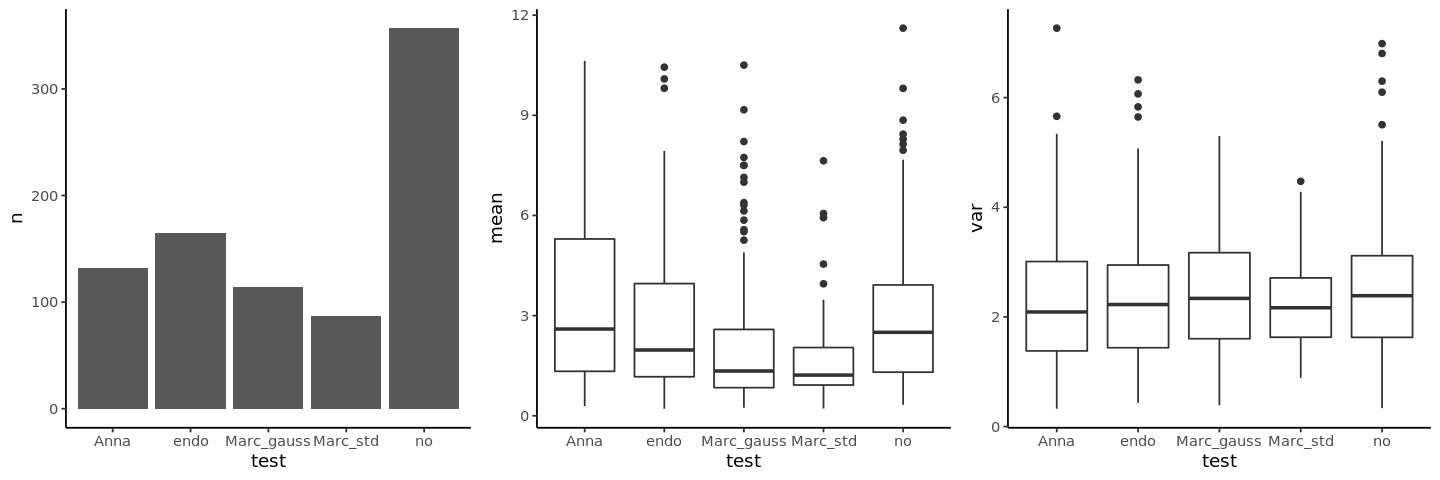

In [60]:
options(repr.plot.width = 12, repr.plot.height = 4)
plot_grid(p1,p2,p3,ncol=3)

In [ ]:
genes